# Оценка качества моделей классификации.

Будем тренироваться интерпретировать качество моделей классификации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Задача: датасет о кредитном скоринге. 
* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [2]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [3]:
df.shape

(689, 21)

Посмотрим, сбалансированная ли выборка.

In [4]:
len(df[df.target == 0]), len(df[df.target == 1])

(382, 307)

Оценим **accuracy** - долю правильных ответов каждого из алгоритмов.

In [5]:
from sklearn.metrics import accuracy_score

print('алгоритм 1:', accuracy_score(df['target'], df['pred1_classes']))
print('алгоритм 2:', accuracy_score(df['target'], df['pred2_classes']))
print('алгоритм 3:', accuracy_score(df['target'], df['pred3_classes']))

алгоритм 1: 0.6618287373004355
алгоритм 2: 0.6719883889695211
алгоритм 3: 0.6400580551523948


***С точки зрения метрики accuracy второй алгоритм работает немного лучше остальных***. Посмотрим на другие метрики.

Теперь посмотрим на **precision** и **recall**.

In [6]:
from sklearn.metrics import precision_score, recall_score

print('алгоритм 1:')
print('точность:', precision_score(df['target'], df['pred1_classes']))
print('полнота:',  recall_score(df['target'], df['pred1_classes']))
print('алгоритм 2:')
print('точность:', precision_score(df['target'], df['pred2_classes']))
print('полнота:',  recall_score(df['target'], df['pred2_classes']))
print('алгоритм 3:')
print('точность:', precision_score(df['target'], df['pred3_classes']))
print('полнота:',  recall_score(df['target'], df['pred3_classes']))

алгоритм 1:
точность: 0.6907216494845361
полнота: 0.4364820846905538
алгоритм 2:
точность: 0.6103542234332425
полнота: 0.7296416938110749
алгоритм 3:
точность: 0.6903225806451613
полнота: 0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

In [7]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

алгоритм 1


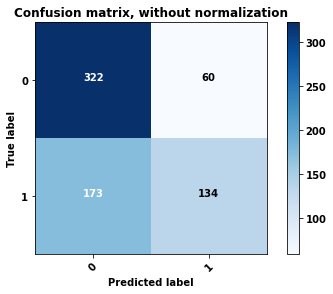

алгоритм 2


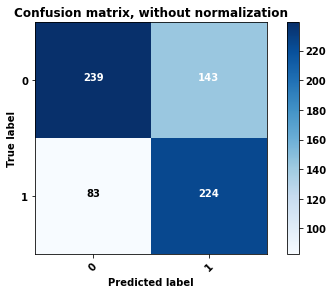

алгоритм 3


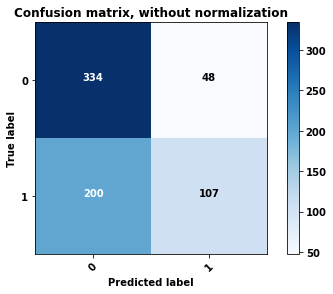

In [8]:
print('алгоритм 1')
plot_confusion_matrix(confusion_matrix(df['target'], df['pred1_classes']), classes=['0','1'],
                        title='Confusion matrix, without normalization')
show()
print('алгоритм 2')
plot_confusion_matrix(confusion_matrix(df['target'], df['pred2_classes']), classes=['0','1'],
                        title='Confusion matrix, without normalization')
show()
print('алгоритм 3')
plot_confusion_matrix(confusion_matrix(df['target'], df['pred3_classes']), classes=['0','1'],
                        title='Confusion matrix, without normalization')
show()

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

Будем изменять порог вероятности в цикле и смотреть на результаты.

Смотрим на **модель 1**:

In [11]:
df['pred1_probs'] > 0.2

0      True
1      True
2      True
3      True
4      True
       ... 
684    True
685    True
686    True
687    True
688    True
Name: pred1_probs, Length: 689, dtype: bool

In [12]:
for t in np.arange(0.1,1,0.1):
    pred1_thr = [1 if x >= t else 0 for x in df['pred1_probs']]
    print('threshold =', t)
    print('полнота(recall):', recall_score(df['target'],pred1_thr))
    print('accuracy:', accuracy_score(df['target'],pred1_thr))
    print()

threshold = 0.1
полнота(recall): 1.0
accuracy: 0.4455732946298984

threshold = 0.2
полнота(recall): 1.0
accuracy: 0.4455732946298984

threshold = 0.30000000000000004
полнота(recall): 0.9185667752442996
accuracy: 0.5645863570391872

threshold = 0.4
полнота(recall): 0.6579804560260586
accuracy: 0.6676342525399129

threshold = 0.5
полнота(recall): 0.4364820846905538
accuracy: 0.6618287373004355

threshold = 0.6
полнота(recall): 0.28664495114006516
accuracy: 0.6386066763425254

threshold = 0.7000000000000001
полнота(recall): 0.21172638436482086
accuracy: 0.6240928882438317

threshold = 0.8
полнота(recall): 0.1237785016286645
accuracy: 0.5965166908563135

threshold = 0.9
полнота(recall): 0.06840390879478828
accuracy: 0.579100145137881



In [13]:
for t in np.arange(0.35,0.6,0.025):
    pred1_thr = [1 if x >= t else 0 for x in df['pred1_probs']]
    print('threshold =', t)
    print('полнота(recall):', recall_score(df['target'],pred1_thr))
    print('accuracy:', accuracy_score(df['target'],pred1_thr))
    print()

threshold = 0.35
полнота(recall): 0.7882736156351792
accuracy: 0.6458635703918723

threshold = 0.375
полнота(recall): 0.7100977198697068
accuracy: 0.6502177068214804

threshold = 0.4
полнота(recall): 0.6579804560260586
accuracy: 0.6676342525399129

threshold = 0.42500000000000004
полнота(recall): 0.5863192182410424
accuracy: 0.6618287373004355

threshold = 0.45000000000000007
полнота(recall): 0.5244299674267101
accuracy: 0.6647314949201741

threshold = 0.4750000000000001
полнота(recall): 0.46905537459283386
accuracy: 0.6632801161103048

threshold = 0.5000000000000001
полнота(recall): 0.4364820846905538
accuracy: 0.6618287373004355

threshold = 0.5250000000000001
полнота(recall): 0.4006514657980456
accuracy: 0.6647314949201741

threshold = 0.5500000000000002
полнота(recall): 0.3485342019543974
accuracy: 0.6531204644412192

threshold = 0.5750000000000002
полнота(recall): 0.3127035830618892
accuracy: 0.6458635703918723



***Наилучший результат:***

threshold = 0.375

полнота(recall): 0.71

accuracy: 0.65

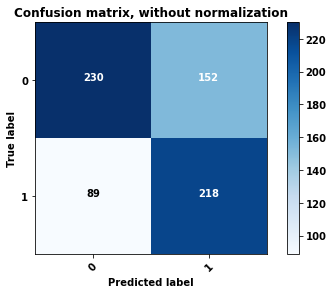

In [14]:
pred1_thr = [1 if x >= 0.375 else 0 for x in df['pred1_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred1_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Теперь посмотрим на **модель 2**:

In [15]:
for t in np.arange(0.1,1,0.1):
    pred2_thr = [1 if x >= t else 0 for x in df['pred2_probs']]
    print('threshold =', t)
    print('полнота(recall):', recall_score(df['target'],pred2_thr))
    print('accuracy:', accuracy_score(df['target'],pred2_thr))
    print()

threshold = 0.1
полнота(recall): 0.990228013029316
accuracy: 0.4818577648766328

threshold = 0.2
полнота(recall): 0.9381107491856677
accuracy: 0.555878084179971

threshold = 0.30000000000000004
полнота(recall): 0.8371335504885994
accuracy: 0.6748911465892597

threshold = 0.4
полнота(recall): 0.7980456026058632
accuracy: 0.683599419448476

threshold = 0.5
полнота(recall): 0.7296416938110749
accuracy: 0.6719883889695211

threshold = 0.6
полнота(recall): 0.5179153094462541
accuracy: 0.6734397677793904

threshold = 0.7000000000000001
полнота(recall): 0.2964169381107492
accuracy: 0.6560232220609579

threshold = 0.8
полнота(recall): 0.26058631921824105
accuracy: 0.6473149492017417

threshold = 0.9
полнота(recall): 0.03908794788273615
accuracy: 0.5718432510885341



In [16]:
for t in np.arange(0.25,0.5,0.025):
    pred2_thr = [1 if x >= t else 0 for x in df['pred2_probs']]
    print('threshold =', t)
    print('полнота(recall):', recall_score(df['target'],pred2_thr))
    print('accuracy:', accuracy_score(df['target'],pred2_thr))
    print()

threshold = 0.25
полнота(recall): 0.9348534201954397
accuracy: 0.5587808417997098

threshold = 0.275
полнота(recall): 0.8371335504885994
accuracy: 0.6748911465892597

threshold = 0.30000000000000004
полнота(recall): 0.8371335504885994
accuracy: 0.6748911465892597

threshold = 0.32500000000000007
полнота(recall): 0.8208469055374593
accuracy: 0.6850507982583455

threshold = 0.3500000000000001
полнота(recall): 0.8143322475570033
accuracy: 0.6821480406386067

threshold = 0.3750000000000001
полнота(recall): 0.8045602605863192
accuracy: 0.6865021770682148

threshold = 0.40000000000000013
полнота(recall): 0.7980456026058632
accuracy: 0.683599419448476

threshold = 0.42500000000000016
полнота(recall): 0.7752442996742671
accuracy: 0.6821480406386067

threshold = 0.4500000000000002
полнота(recall): 0.742671009771987
accuracy: 0.6777939042089985

threshold = 0.4750000000000002
полнота(recall): 0.742671009771987
accuracy: 0.6777939042089985



***Наилучший результат:***

threshold = 0.3

полнота(recall): 0.837
    
accuracy: 0.675

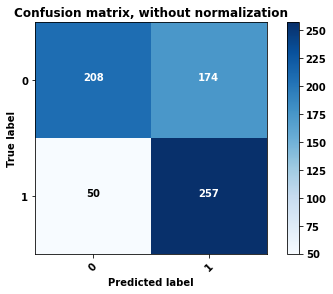

In [17]:
pred2_thr = [1 if x >= 0.3 else 0 for x in df['pred2_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred2_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Посмотрим на **модель 3**:

In [18]:
for t in np.arange(0.1,1,0.1):
    pred3_thr = [1 if x >= t else 0 for x in df['pred3_probs']]
    print('threshold =', t)
    print('полнота(recall):', recall_score(df['target'],pred3_thr))
    print('accuracy:', accuracy_score(df['target'],pred3_thr))
    print()

threshold = 0.1
полнота(recall): 1.0
accuracy: 0.4455732946298984

threshold = 0.2
полнота(recall): 0.7068403908794788
accuracy: 0.6226415094339622

threshold = 0.30000000000000004
полнота(recall): 0.5146579804560261
accuracy: 0.6313497822931785

threshold = 0.4
полнота(recall): 0.41368078175895767
accuracy: 0.6458635703918723

threshold = 0.5
полнота(recall): 0.3485342019543974
accuracy: 0.6400580551523948

threshold = 0.6
полнота(recall): 0.30944625407166126
accuracy: 0.6386066763425254

threshold = 0.7000000000000001
полнота(recall): 0.26058631921824105
accuracy: 0.6284470246734397

threshold = 0.8
полнота(recall): 0.23127035830618892
accuracy: 0.6168359941944848

threshold = 0.9
полнота(recall): 0.1986970684039088
accuracy: 0.613933236574746



In [19]:
for t in np.arange(0.35,0.6,0.025):
    pred3_thr = [1 if x >= t else 0 for x in df['pred3_probs']]
    print('threshold =', t)
    print('полнота(recall):', recall_score(df['target'],pred3_thr))
    print('accuracy:', accuracy_score(df['target'],pred3_thr))
    print()

threshold = 0.35
полнота(recall): 0.46905537459283386
accuracy: 0.6386066763425254

threshold = 0.375
полнота(recall): 0.4364820846905538
accuracy: 0.6386066763425254

threshold = 0.4
полнота(recall): 0.41368078175895767
accuracy: 0.6458635703918723

threshold = 0.42500000000000004
полнота(recall): 0.3941368078175896
accuracy: 0.6444121915820029

threshold = 0.45000000000000007
полнота(recall): 0.36482084690553745
accuracy: 0.637155297532656

threshold = 0.4750000000000001
полнота(recall): 0.3550488599348534
accuracy: 0.6386066763425254

threshold = 0.5000000000000001
полнота(recall): 0.3485342019543974
accuracy: 0.6400580551523948

threshold = 0.5250000000000001
полнота(recall): 0.34201954397394135
accuracy: 0.6415094339622641

threshold = 0.5500000000000002
полнота(recall): 0.3257328990228013
accuracy: 0.6357039187227866

threshold = 0.5750000000000002
полнота(recall): 0.3257328990228013
accuracy: 0.6415094339622641



***Наилучший результат:***

threshold = 0.4

полнота(recall): 0.414
    
accuracy: 0.646 (наибольшая точность)

***Модель не проходит по критериям (доля правильных ответов меньше 0.65)!***

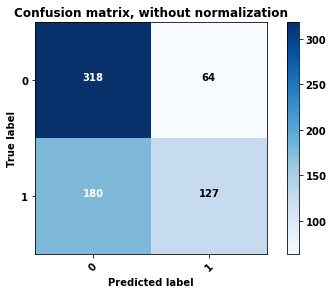

In [20]:
pred3_thr = [1 if x >= 0.4 else 0 for x in df['pred3_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred3_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

**Выводы:** с поставленной задачей лучше всего справляется модель 2 (полнота: 0.837,
accuracy: 0.675). 

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

Будем изменять порог вероятности в цикле и смотреть на результаты.

Смотрим на **модель 1**:

In [ ]:
# your code here

In [ ]:
# your code here

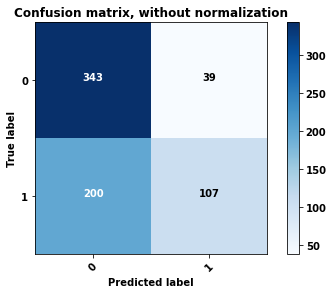

In [21]:
pred1_thr = [1 if x >= 0.55
             else 0 for x in df['pred1_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred1_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

In [24]:
precision_score(df['target'], pred1_thr)

0.7328767123287672

In [25]:
accuracy_score(df['target'], pred1_thr)

0.6531204644412192

Смотрим на **модель 2**:

In [ ]:
# your code here

In [ ]:
for t in np.arange(0.25,0.8,0.025):
    pred2_thr = [1 if x >= t else 0 for x in df['pred2_probs']]
    print('threshold =', t)
    print('точность(precision):', precision_score(df['target'],pred2_thr))
    print('accuracy:', accuracy_score(df['target'],pred2_thr))
    print()

***Наилучший результат:***

threshold = 0.725

точность(precision): 0.837
    
accuracy: 0.65

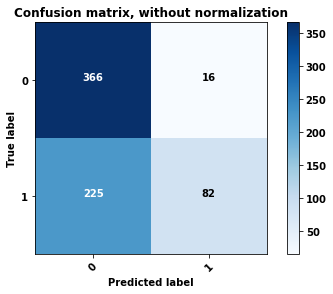

In [26]:
pred2_thr = [1 if x >= 0.725 else 0 for x in df['pred2_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred2_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

In [27]:
precision_score(df['target'], pred2_thr)

0.8367346938775511

In [29]:
accuracy_score(df['target'], pred2_thr)

0.6502177068214804

Смотрим на **модель 3**:

In [ ]:
for t in np.arange(0.1,1,0.1):
    pred3_thr = [1 if x >= t else 0 for x in df['pred3_probs']]
    print('threshold =', t)
    print('точность(precision):', precision_score(df['target'],pred3_thr))
    print('accuracy:', accuracy_score(df['target'],pred3_thr))
    print()

In [ ]:
for t in np.arange(0.4,0.65,0.025):
    pred3_thr = [1 if x >= t else 0 for x in df['pred3_probs']]
    print('threshold =', t)
    print('точность(precision):', precision_score(df['target'],pred3_thr))
    print('accuracy:', accuracy_score(df['target'],pred3_thr))
    print()

***Наилучший результат:***

threshold = 0.575

точность(precision): 0.714
    
accuracy: 0.642
    
***Модель не проходит по критериям (точность меньше 0.65)!***

In [ ]:
pred3_thr = [1 if x >= 0.575 else 0 for x in df['pred3_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred3_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

Найдем порог для достижения максимального F1-score для наилучшей модели (вторая модель) и построим матрицу ошибок (***проверьте, что F1-score у двух оставшихся моделей ниже!***).

In [ ]:
from sklearn.metrics import f1_score

for t in np.arange(0.1,1,0.1):
    pred1_thr = [1 if x >= t else 0 for x in df['pred1_probs']]
    print('threshold =', t)
    print('f1-score:', f1_score(df['target'],pred1_thr))
    print('accuracy:', accuracy_score(df['target'],pred1_thr))
    print()

In [ ]:
from sklearn.metrics import f1_score

for t in np.arange(0.35,0.6,0.025):
    pred1_thr = [1 if x >= t else 0 for x in df['pred1_probs']]
    print('threshold =', t)
    print('f1-score:', f1_score(df['target'],pred1_thr))
    print('accuracy:', accuracy_score(df['target'],pred1_thr))
    print()

***Наилучший результат:***

threshold = 0.375

f1-score: 0.644
    
accuracy: 0.65

In [ ]:
pred1_thr = [1 if x >= 0.375 else 0 for x in df['pred1_probs']]

plot_confusion_matrix(confusion_matrix(df['target'], pred1_thr), classes=['0','1'],
                        title='Confusion matrix, without normalization')

Посмотрим на roc-auc.

In [ ]:
from sklearn.metrics import roc_auc_score

print('алгоритм 1:', roc_auc_score(df['target'], df['pred1_probs']))
print('алгоритм 2:', roc_auc_score(df['target'], df['pred2_probs']))
print('алгоритм 3:', roc_auc_score(df['target'], df['pred3_probs']))

Построим roc-кривую для каждой модели и отметим на графике roc-auc.

In [ ]:
from sklearn.metrics import roc_curve, auc

for n in range(3):
    print('Модель ' + str(n+1) + ':')
    
    fpr, tpr, threshold = roc_curve(df['target'], df['pred' + str(n+1) + '_probs'])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Выводы

**1. В данной задаче модель 2 выигрывает по всем метрикам. Однако не во всех задачах одна и та же модель будет лучшей относительно всех метрик!** 

**2. Качество решения задачи нельзя улучшить с помощью выбора метрики или настройки порога, но с помощью настройки порога можно добиться наилучшего результата в рамках поставленной задачи. Чтобы улучшить качество решения - необходимо изменять саму модель.**

#### Что ещё можно сделать

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [30]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



## Оценка качества в задачах многоклассовой классификации

### Precision, recall & confusion matrix для многоклассовой классификации

<img src="CM1.png">

<img src="CM2.png">

Для класса Cats:
    
    precision = доля правильно предсказанных Cats / все предсказанные Cats = 4/13
    
    recall = доля правильно предсказанных Cats / все истинные Cats = 4/6

In [31]:
from sklearn import metrics

# Constants
C="Cat"
F="Fish"
H="Hen"

# True values
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



### Macro avg (average)

***macro average (precision) = среднее арифметическое всех (precision)***

Пример:
***macro avg precision = (0.308+0.667+0.667)/3=0.547***

### Micro avg (average)

***micro average (precision) = precision, но вычисленная на всех данных вместе.***

Пример:
precision = TP/(TP+FP)

TP - все правильно предсказанные объекты: 
$$TP = 4 + 2 + 6 = 12$$

FP - например, все Cat, предсказанные как Fish и т.д.
$$FP = 6 + 3 + 1 + 0 + 1 + 2 = 13$$

Поэтому
***micro avg precision*** $ = 12/(12+13)=0.480$

### Cтатьи про метрики качества многоклассовой классификации:
    
1. https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
        
2. https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

# Задание

Решите задачу кредитного скоринга самостоятельно при помощи логистической регрессии. Какого качества на кросс-валидации (f1-score, roc-auc) вам удалось достичь?

In [35]:
df.columns[:14]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'],
      dtype='object')

In [36]:
from sklearn.linear_model import LogisticRegression # простейший классификатор

X = df[df.columns[:14]] # матрица объект-признак
y = df['target'] # вектор ответов

In [56]:
from sklearn.model_selection import cross_val_score, cross_validate

model = LogisticRegression()

cv = cross_validate(model, X, y, cv=3, scoring=['f1','roc_auc','precision','recall'])

c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [57]:
cv

{'fit_time': array([0.04899979, 0.04351425, 0.02900338]),
 'score_time': array([0.01300144, 0.01099634, 0.00999761]),
 'test_f1': array([0.86699507, 0.75376884, 0.74876847]),
 'test_roc_auc': array([0.91260723, 0.81591621, 0.85757295]),
 'test_precision': array([0.87128713, 0.78125   , 0.75247525]),
 'test_recall': array([0.8627451 , 0.72815534, 0.74509804])}

In [53]:
cv['test_f1'].mean()

0.7898441303397118

In [54]:
cv['test_roc_auc'].mean()

0.8620321317296252

In [58]:
cv['test_precision'].mean()

0.8016707920792078

In [59]:
cv['test_recall'].mean()

0.7786661590202425